In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
np.nan == np.nan

False

In [3]:
None == None

True

In [55]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [56]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kink, Mr. Vincenz",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [58]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# データ
1. NameはUniqueが多いので削除
2. Cabinは欠損値が多いので削除
3. Ageは、欠損値が多い。削除を検討
4. Embarkedは欠損値があるが、少ないので埋める
5. Sexはカテゴリデータ、数値化する
6. TiketはUniqueが多いので削除


In [68]:
target = train_data.Survived
train = train_data.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)


In [69]:
sex_mapping = {'male':0, 'female':1}
train.Sex = train_data.Sex.map(sex_mapping)

In [70]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [71]:
train_demo = train.drop('Age', axis=1)

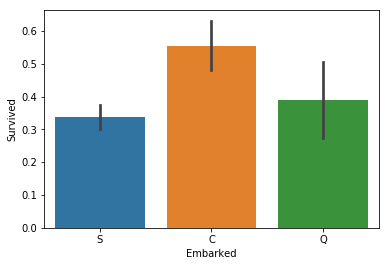

In [74]:
sns.barplot(x="Embarked", y="Survived", data=train)

In [75]:
Embarked_mapping = {'S':0, 'Q':1, 'C':2}
train.Embarked = train.Embarked.map(Embarked_mapping)

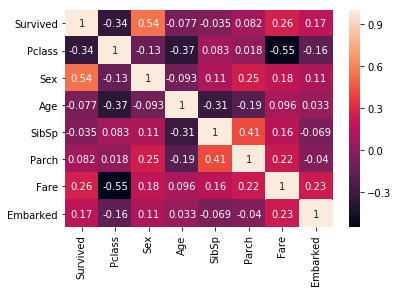

In [77]:
sns.heatmap(train.corr(),annot=True)

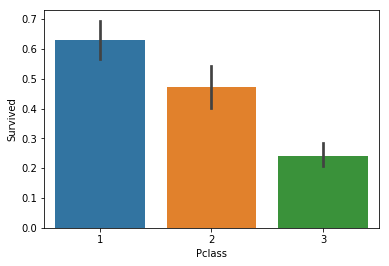

In [78]:
sns.barplot(x="Pclass", y="Survived", data=train)

In [80]:
Pclass_mapping = {1:2, 2:1, 3:0}
train.Pclass = train.Pclass.map(Pclass_mapping)

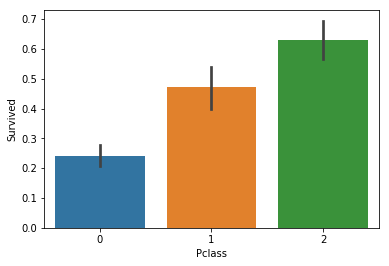

In [81]:
sns.barplot(x="Pclass", y="Survived", data=train)

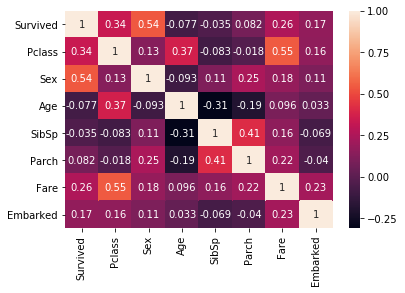

In [82]:
sns.heatmap(train.corr(),annot=True)